In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Cargar los datos desde el archivo CSV
file_path = "../data/ibex_data_clean.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print("Datos originales:")
print(df.head())

# Convertir la columna 'Date' a tipo datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Asegúrate de que el formato coincida
df.set_index('Date', inplace=True)

# Filtrar todas las filas donde 'Close' no sea nulo o NaN
df_filtered = df.dropna(subset=['Close'])

# Seleccionar la columna objetivo
data = df_filtered[['Close']]

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Crear secuencias de datos para entrenamiento
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Definir la longitud de la secuencia (por ejemplo, 60 días)
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Dividir los datos en entrenamiento y prueba (80% - 20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Datos originales:
         Date    Adj Close        Close         High          Low  \
0  2012-01-03  8732.391602  8732.400391  8743.299805  8597.099609   
1  2012-01-04  8581.791016  8581.799805  8701.299805  8526.799805   
2  2012-01-05  8329.590820  8329.599609  8598.700195  8301.200195   
3  2012-01-06  8289.090820  8289.099609  8445.900391  8233.799805   
4  2012-01-09  8278.891602  8278.900391  8404.400391  8250.099609   

          Open     Volume  Daily Range  Price Change  Log Volume  
0  8739.200195  186689000   146.200195     -6.799805   19.044955  
1  8683.400391  243803000   174.500000   -101.600586   19.311871  
2  8598.700195  192704000   297.500000   -269.100586   19.076666  
3  8369.700195  153765000   212.100586    -80.600586   18.850936  
4  8314.500000  173948000   154.300781    -35.599609   18.974267  
Epoch 1/10


/Users/carlotasanchezgonzalez/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0447 - val_loss: 0.0016
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0017 - val_loss: 8.9641e-04
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0013 - val_loss: 8.6182e-04
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0012 - val_loss: 8.2269e-04
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0013 - val_loss: 5.5969e-04
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 9.9213e-04 - val_loss: 6.0174e-04
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 9.5494e-04 - val_loss: 0.0010
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.7241e-04
Test Loss: 0.0010168972657993436


### Métricas y gráficas de evaluación

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Métricas del Modelo LSTM: (0.0010168973017261828, 0.025245245425976174, 0.031888827224063644, 0.9735581780002035)
MSE: 0.0010168973017261828, MAE: 0.025245245425976174, RMSE: 0.031888827224063644, R²: 0.9735581780002035


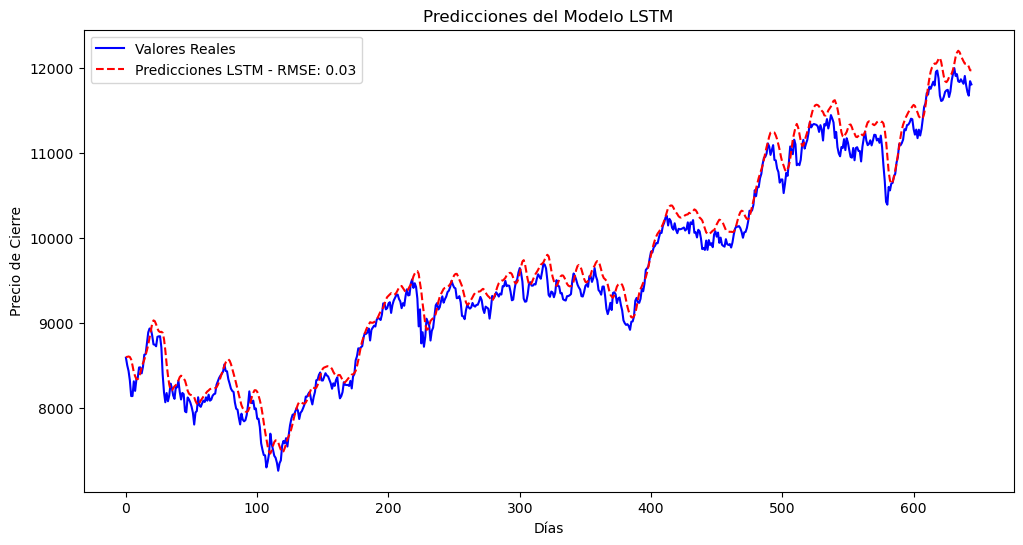

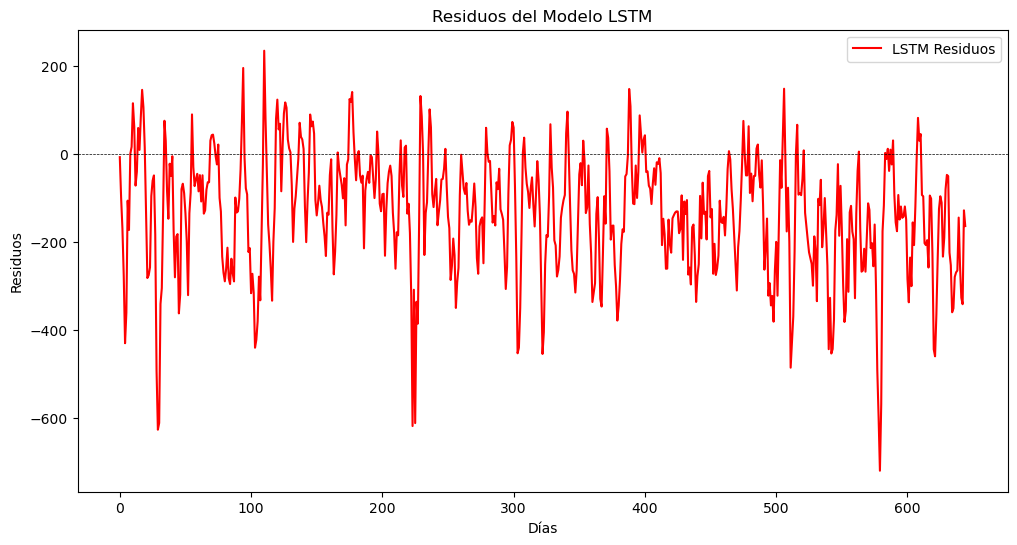

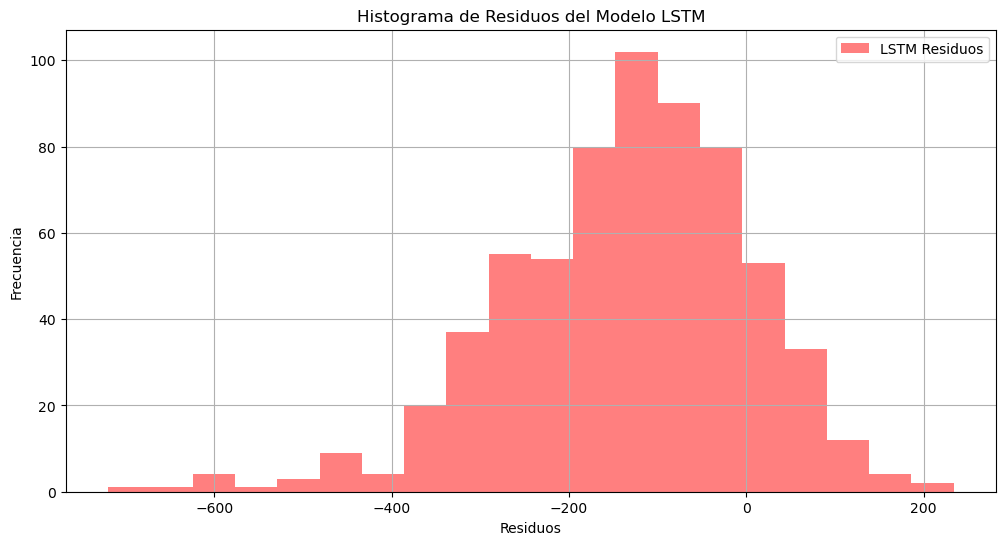

     Día  LSTM Residuos
0      0      -7.873047
1      1     -99.714844
2      2    -170.037109
3      3    -277.079102
4      4    -430.250000
..   ...            ...
640  640    -254.129883
641  641    -327.197266
642  642    -341.639648
643  643    -128.659180
644  644    -164.302734

[645 rows x 2 columns]
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Coeficiente de determinación R² en entrenamiento: 0.96
Coeficiente de determinación R² en prueba: 0.97


In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Hacer predicciones con el modelo LSTM
predicted_prices = model.predict(X_test)

# Función para calcular métricas de evaluación
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calcular las métricas para el conjunto de prueba
lstm_metrics = calcular_metricas(y_test, predicted_prices)

# Imprimir las métricas
print("Métricas del Modelo LSTM:", lstm_metrics)
print(f"MSE: {lstm_metrics[0]}, MAE: {lstm_metrics[1]}, RMSE: {lstm_metrics[2]}, R²: {lstm_metrics[3]}")

# Hacer predicciones con el modelo LSTM
predicted_prices_unscaled = scaler.inverse_transform(predicted_prices)
y_test_unscaled = scaler.inverse_transform(y_test)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# Graficar los valores reales y las predicciones
plt.plot(y_test_unscaled, label='Valores Reales', color='blue')
plt.plot(predicted_prices_unscaled, label=f'Predicciones LSTM - RMSE: {lstm_metrics[2]:.2f}', linestyle='--', color='red')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.title('Predicciones del Modelo LSTM')
plt.legend()
plt.show()

# Graficar los residuos
lstm_residuals = y_test_unscaled - predicted_prices_unscaled
plt.figure(figsize=(12, 6))
plt.plot(lstm_residuals, label='LSTM Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Días')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo LSTM')
plt.legend()
plt.show()

# Graficar histograma de los residuos
plt.figure(figsize=(12, 6))
plt.hist(lstm_residuals, bins=20, color='red', alpha=0.5, label='LSTM Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo LSTM')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame para los residuos
residuals_df = pd.DataFrame({
    'Día': np.arange(len(y_test_unscaled)),
    'LSTM Residuos': lstm_residuals.flatten()
})

# Mostrar la tabla de resultados de residuos
print(residuals_df)

# Calcular y mostrar el coeficiente R² en entrenamiento (opcional)
train_predictions = model.predict(X_train)
train_predictions_unscaled = scaler.inverse_transform(train_predictions)
r2_train = r2_score(scaler.inverse_transform(y_train), train_predictions_unscaled)
print(f'Coeficiente de determinación R² en entrenamiento: {r2_train:.2f}')
print(f'Coeficiente de determinación R² en prueba: {lstm_metrics[3]:.2f}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

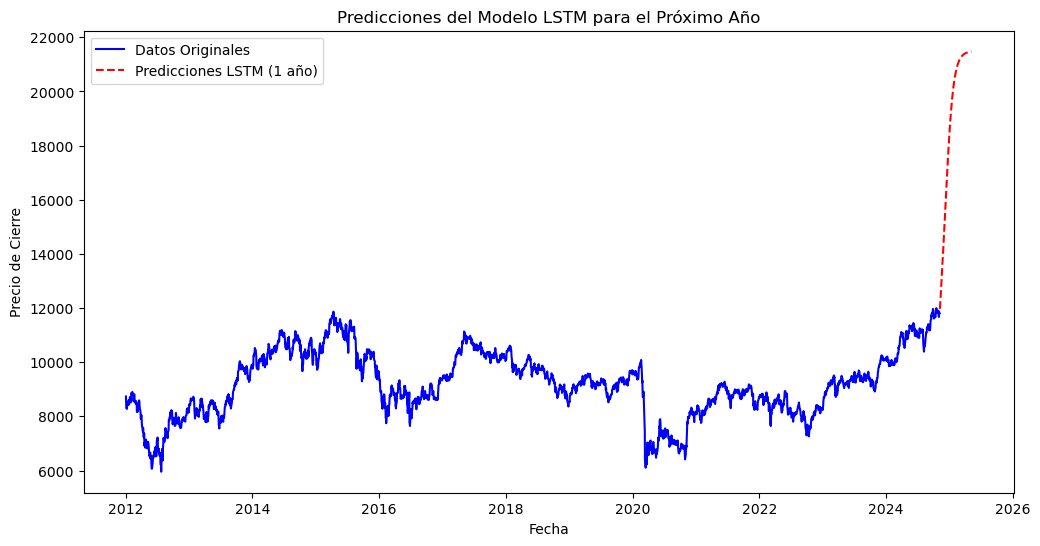

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Número de días a predecir (un año completo)
prediction_days = 365

# Crear una lista para almacenar las predicciones
predictions = []

# Usar la última secuencia de datos de entrenamiento para generar la primera predicción
last_sequence = X_test[-1]  # Última secuencia en X_test

# Generar predicciones día a día
for _ in range(prediction_days):
    # Hacer una predicción para el siguiente día
    next_pred = model.predict(np.expand_dims(last_sequence, axis=0))
    predictions.append(next_pred[0][0])  # Guardar la predicción
    
    # Actualizar la secuencia deslizante eliminando el primer valor y añadiendo la predicción al final
    last_sequence = np.vstack((last_sequence[1:], next_pred))

# Invertir la escala de las predicciones
predictions_unscaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Crear un rango de fechas para el próximo año
last_date = df.index[-1]  # Última fecha en el DataFrame original
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=prediction_days, freq='D')

# Crear un DataFrame para las predicciones futuras
predictions_df = pd.DataFrame(data=predictions_unscaled, index=future_dates, columns=['Predicted Close'])

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Datos Originales', color='blue')
plt.plot(predictions_df, label='Predicciones LSTM (1 año)', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicciones del Modelo LSTM para el Próximo Año')
plt.legend()
plt.show()
